# Decision Tree

In [39]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 로드 및 전처리

In [40]:
from sklearn.datasets import load_iris
from sklearn import tree

In [41]:
iris=load_iris(as_frame=True)   # iris dataset 불러오기 (150 data, 4 features, 1 target)
iris.frame  # sepal length, width (꽃받침 길이, 너비); petal length, width (꽃잎 길이, 너비)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [42]:
iris.target_names  # target 0: setosa, target 1: versicolor, target 2: virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Decision Tree Classifier
+ [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

> ```python
> class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None,
> min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
> random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
> class_weight=None, ccp_alpha=0.0)
> ```

+ parameters:
  + max_depth: 트리 깊이의 최대 한계 설정, Generalize와 연관
  + min_samples_split: node를 나누는 최소 샘플 개수 설정, 신뢰도와 연관
  + ...기타 여러 parameter를 조정하여 overfitting을 최소화함

In [43]:
X, y = iris.data, iris.target
# create a decision tree classifier

clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=None, min_samples_split=50)

# train decision tree with the iris dataset
clf = clf.fit(X, y)  

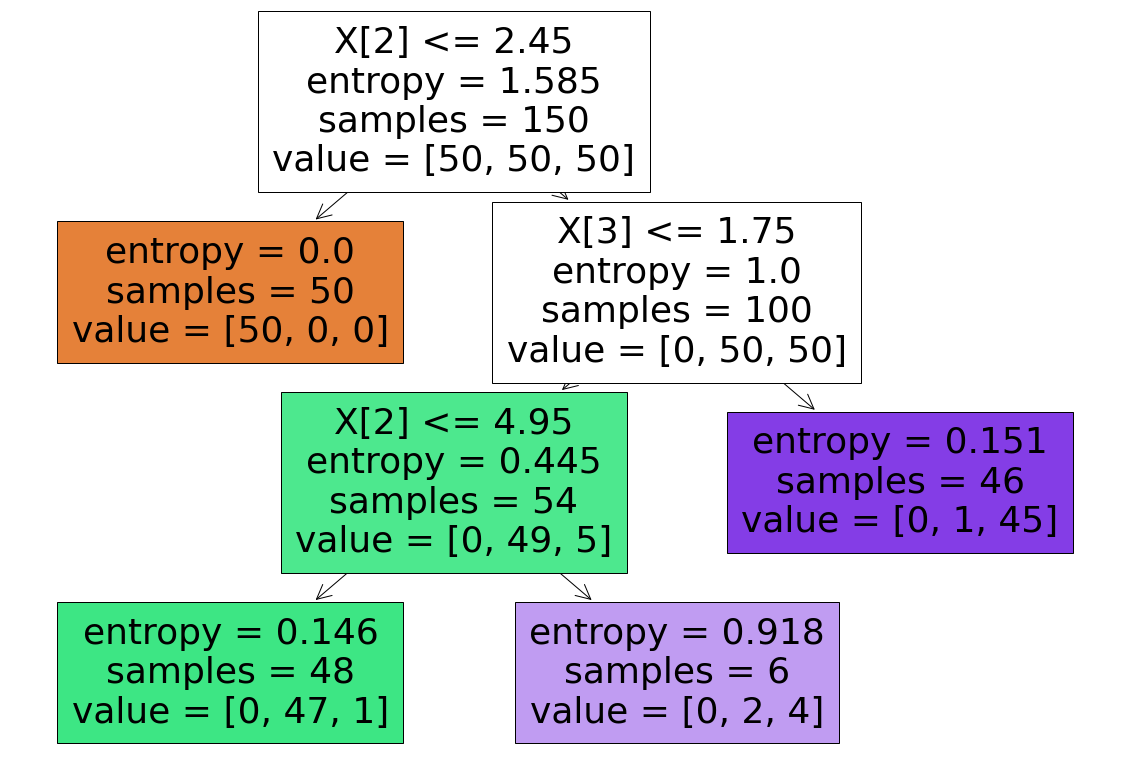

In [44]:
fig = plt.figure(figsize=(20,14))
ax = fig.add_subplot()
# Plot Decision Tree
tree.plot_tree(clf, filled=True, ax=ax)
plt.show()

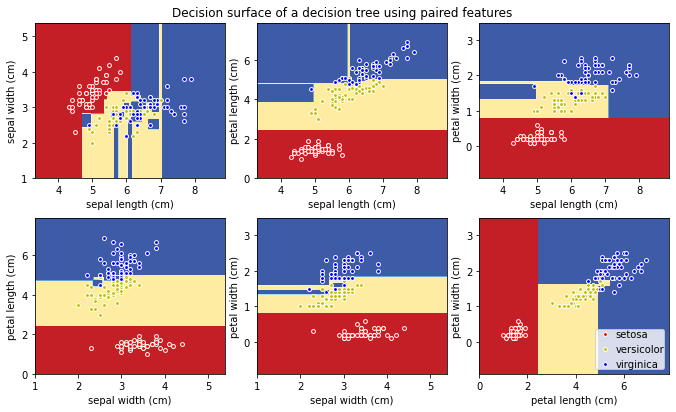

In [46]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

iris = load_iris()

fig = plt.figure(figsize=(10,6))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # 두 개의 feature 쌍 기준으로 decision boundary를 그리는 코드
    X = iris.data[:, pair]
    y = iris.target

    # Decision tree 학습
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
 
    # Decision Tree에 지점의 값을 대입하여 decision boundary를 구함
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='white', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()